In [1]:
import pandas as pd
import logging

In [2]:
df = pd.read_csv("Drugs_product.csv", encoding='latin-1')
print(df.head())

                                        PRODUCTID PRODUCTNDC  \
0  0002-1200_4bd46cbe-cdc1-4329-a8e7-22816bd7fc33  0002-1200   
1  0002-1407_14757f9d-f641-4836-acf3-229265588d1d  0002-1407   
2  0002-1433_aaae85ae-9295-465f-b938-463b74b8d5bd  0002-1433   
3  0002-1434_aaae85ae-9295-465f-b938-463b74b8d5bd  0002-1434   
4  0002-1445_2ecde4c5-5128-4725-9cf5-64384857eb1c  0002-1445   

           PRODUCTTYPENAME      PROPRIETARYNAME PROPRIETARYNAMESUFFIX  \
0  HUMAN PRESCRIPTION DRUG               Amyvid                   NaN   
1  HUMAN PRESCRIPTION DRUG  Quinidine Gluconate                   NaN   
2  HUMAN PRESCRIPTION DRUG            Trulicity                   NaN   
3  HUMAN PRESCRIPTION DRUG            Trulicity                   NaN   
4  HUMAN PRESCRIPTION DRUG                TALTZ                   NaN   

    NONPROPRIETARYNAME       DOSAGEFORMNAME     ROUTENAME  STARTMARKETINGDATE  \
0     Florbetapir F 18  INJECTION, SOLUTION   INTRAVENOUS          20120601.0   
1  Quinidine G

In [3]:
df['PRODUCTTYPENAME'] = df['PRODUCTTYPENAME'].fillna("Unknown")

In [4]:
print(df.shape)
print(df.columns)
df.head()


(117365, 18)
Index(['PRODUCTID', 'PRODUCTNDC', 'PRODUCTTYPENAME', 'PROPRIETARYNAME',
       'PROPRIETARYNAMESUFFIX', 'NONPROPRIETARYNAME', 'DOSAGEFORMNAME',
       'ROUTENAME', 'STARTMARKETINGDATE', 'ENDMARKETINGDATE',
       'MARKETINGCATEGORYNAME', 'APPLICATIONNUMBER', 'LABELERNAME',
       'SUBSTANCENAME', 'ACTIVE_NUMERATOR_STRENGTH', 'ACTIVE_INGRED_UNIT',
       'PHARM_CLASSES', 'DEASCHEDULE'],
      dtype='object')


,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE
0,0002-1200_4bd46cbe-cdc1-4329-a8e7-22816bd7fc33,0002-1200,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,20120601.0,NaN,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN
1,0002-1407_14757f9d-f641-4836-acf3-229265588d1d,0002-1407,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,NaN,Quinidine Gluconate,SOLUTION,INTRAVENOUS,19500712.0,NaN,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",NaN
2,0002-1433_aaae85ae-9295-465f-b938-463b74b8d5bd,0002-1433,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN
3,0002-1434_aaae85ae-9295-465f-b938-463b74b8d5bd,0002-1434,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,1.5,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN
4,0002-1445_2ecde4c5-5128-4725-9cf5-64384857eb1c,0002-1445,HUMAN PRESCRIPTION DRUG,TALTZ,NaN,ixekizumab,"INJECTION, SOLUTION",SUBCUTANEOUS,20160322.0,NaN,BLA,BLA125521,Eli Lilly and Company,IXEKIZUMAB,80,mg/mL,"Interleukin-17A Antagonist [EPC],Interleukin-1...",NaN


In [5]:
df.columns = df.columns.str.strip().str.upper()
df = df.drop_duplicates()

In [6]:
df['STARTMARKETINGDATE'] = pd.to_datetime(df['STARTMARKETINGDATE'], errors='coerce')
df['ENDMARKETINGDATE'] = pd.to_datetime(df['ENDMARKETINGDATE'], errors='coerce')

In [7]:
df = df.fillna({
    'PROPRIETARYNAMESUFFIX': '',
    'ENDMARKETINGDATE': pd.NaT,
    'DEASCHEDULE': 'Unknown'
})

In [8]:
# Marketing duration
df['MARKETING_DURATION_YEARS'] = (pd.to_datetime('today') - df['STARTMARKETINGDATE']).dt.days / 365

# Drug full name
df['FULL_DRUG_NAME'] = df['PROPRIETARYNAME'] + " " + df['PROPRIETARYNAMESUFFIX']

In [ ]:
df['LABELERNAME'] = df['LABELERNAME'].str.title().str.strip()
df['PHARM_CLASSES'] = df['PHARM_CLASSES'].str.lower()

In [10]:
df.to_csv("cleaned_drugs_product.csv", index=False)


In [11]:
df['PRODUCTTYPENAME'].value_counts().head()

,count
PRODUCTTYPENAME,
HUMAN OTC DRUG,60654
HUMAN PRESCRIPTION DRUG,54484
NON-STANDARDIZED ALLERGENIC,1684
PLASMA DERIVATIVE,330
STANDARDIZED ALLERGENIC,104


In [12]:
df.groupby('ROUTENAME')['MARKETING_DURATION_YEARS'].mean().sort_values(ascending=False)

,MARKETING_DURATION_YEARS
ROUTENAME,
EPIDURAL; PERCUTANEOUS; TOPICAL,55.509589
EPIDURAL; RETROBULBAR,55.509589
CUTANEOUS; IRRIGATION; OPHTHALMIC; TOPICAL,55.509589
INFILTRATION; INTRAVENOUS,55.509589
INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; SOFT TISSUE,55.509589
...,...
NASAL,55.509589
RECTAL; VAGINAL,55.509589
OROPHARYNGEAL,55.509589


<Axes: title={'center': 'Drug Schedule Distribution'}, xlabel='DEASCHEDULE'>

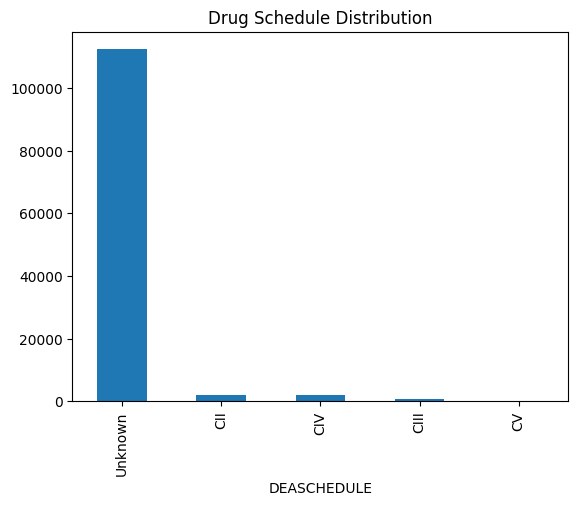

In [13]:
df['DEASCHEDULE'].value_counts().plot(kind='bar', title='Drug Schedule Distribution')